### [Click here to run this notebook online](https://colab.research.google.com/drive/1jLwyYILUMlotVuEXL4fGpNJoaDgefD3r?usp=sharing).

# Task 1

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import skimage.exposure as exposure
import skimage.util as util

In [115]:
img = np.array([
     [4,4,4,4,4,4,4,0],
     [4,5,5,5,5,5,4,0],
     [4,5,6,6,6,5,4,0],
     [4,5,6,7,6,5,4,0],
     [4,5,6,6,6,5,4,0],
     [4,5,5,5,5,5,4,0],
     [4,4,4,4,4,4,4,0],
     [4,4,4,4,4,4,4,0],
],dtype='uint8')


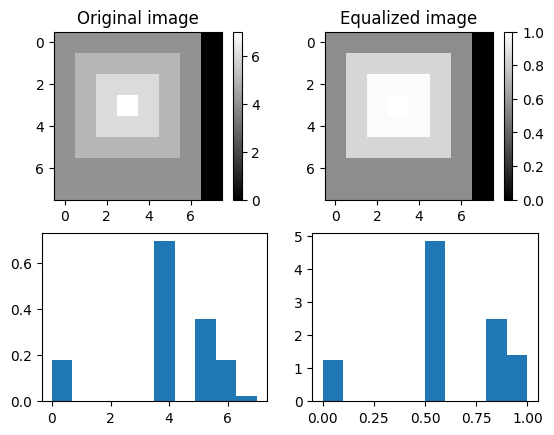

In [116]:
def equalize_hist(image:np.ndarray):
    hist, bins = np.histogram(image.flatten(), bins=8, range=[0,8])
    cdf = hist.cumsum()
    cdf_normed = ((cdf - cdf.min()) / (cdf.max() - cdf.min()))
    out = np.interp(img, bins[:-1], cdf_normed)
    return out

# img_heq = exposure.equalize_hist(img)
img_heq = equalize_hist(img)
# img_heq = util.img_as_ubyte(img_heq) //  32

fig = plt.figure()
plt.rcParams['image.cmap'] = 'gray'

plt.subplot(221)
plt.imshow(img)
plt.title("Original image")
plt.colorbar();


plt.subplot(222)
plt.imshow(img_heq)
plt.title("Equalized image")
plt.colorbar();

plt.subplot(223)
plt.hist(img.flatten(),density=True);

plt.subplot(224)
plt.hist(img_heq.flatten(),density=True);

# Task 2

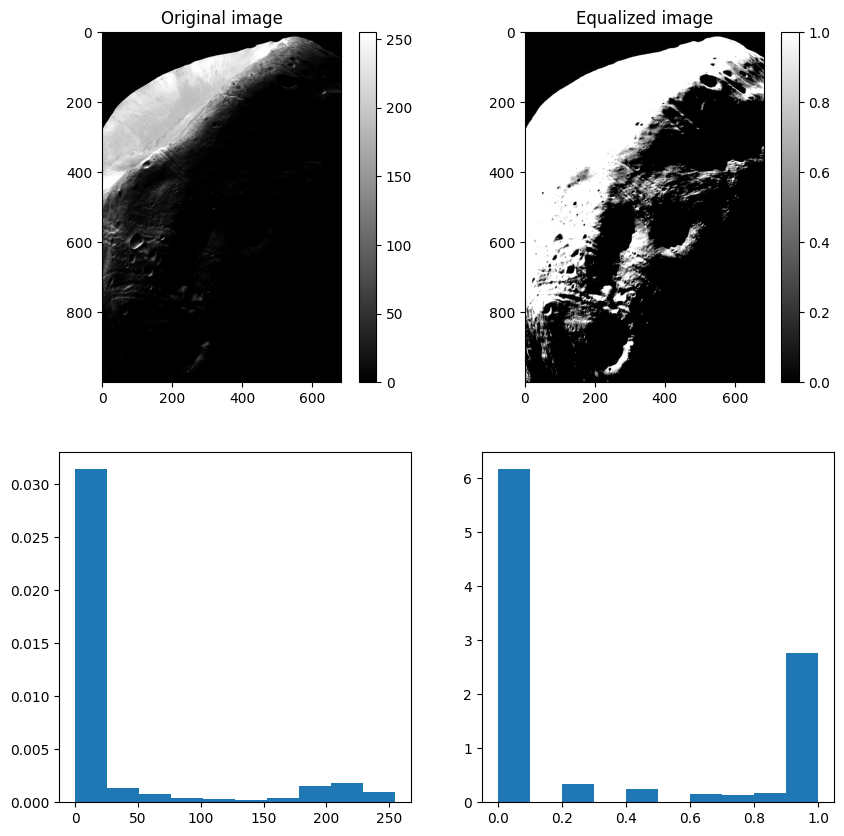

In [77]:
img = Image.open('moon.tif')
img = np.array(img)

img_heq = equalize_hist(img)

fig = plt.figure(figsize=(10,10))
plt.rcParams['image.cmap'] = 'gray'

plt.subplot(221)
plt.imshow(img)
plt.title("Original image")
plt.colorbar();


plt.subplot(222)
plt.imshow(img_heq)
plt.title("Equalized image")
plt.colorbar();

plt.subplot(223)
plt.hist(img.flatten(),density=True);

plt.subplot(224)
plt.hist(img_heq.flatten(),density=True);

## Task 3

Text(0.5, 1.0, 'Gaussian filter')

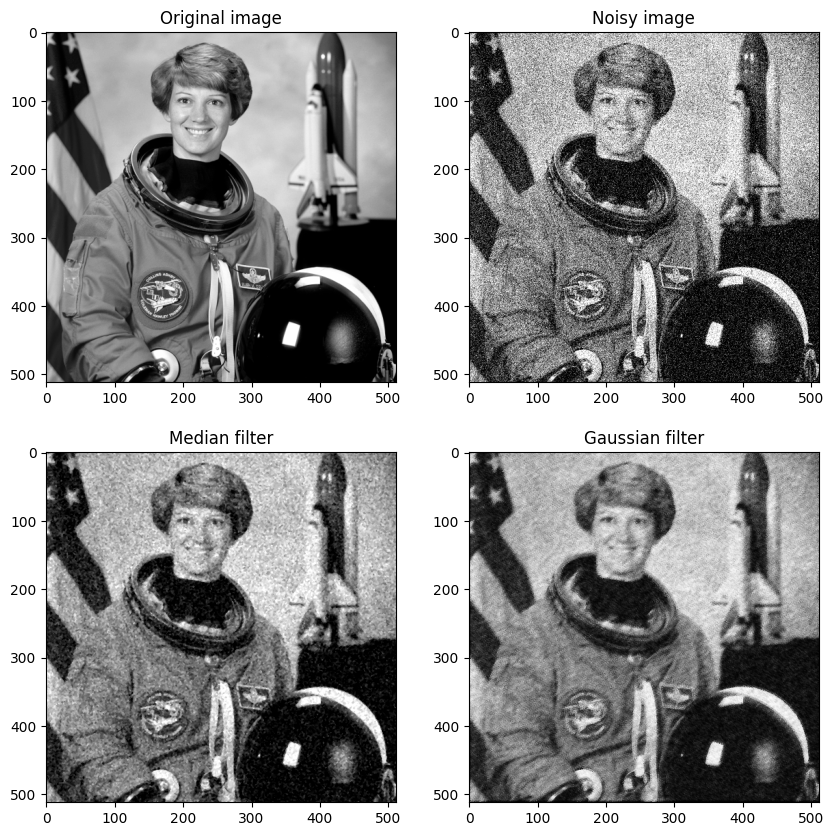

In [107]:
import skimage.data as data
import skimage.color as color
import skimage.filters as filters
import skimage.restoration as restoration

img = data.astronaut()
img = color.rgb2gray(img)
img_nosy = np.clip(img + np.random.normal(loc=0, scale=.2, size=img.shape), 0, 1)

img_filt_med = filters.median(img_nosy)
img_filt_gau = restoration.denoise_bilateral(img_nosy)

fig = plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(img)
plt.title("Original image")


plt.subplot(222)
plt.imshow(img_nosy)
plt.title("Noisy image")


plt.subplot(223)
plt.imshow(img_filt_med)
plt.title("Median filter")


plt.subplot(224)
plt.imshow(img_filt_gau)
plt.title("Bilateral denoising")

Text(0.5, 1.0, 'Sharpened radius 20, amount 1')

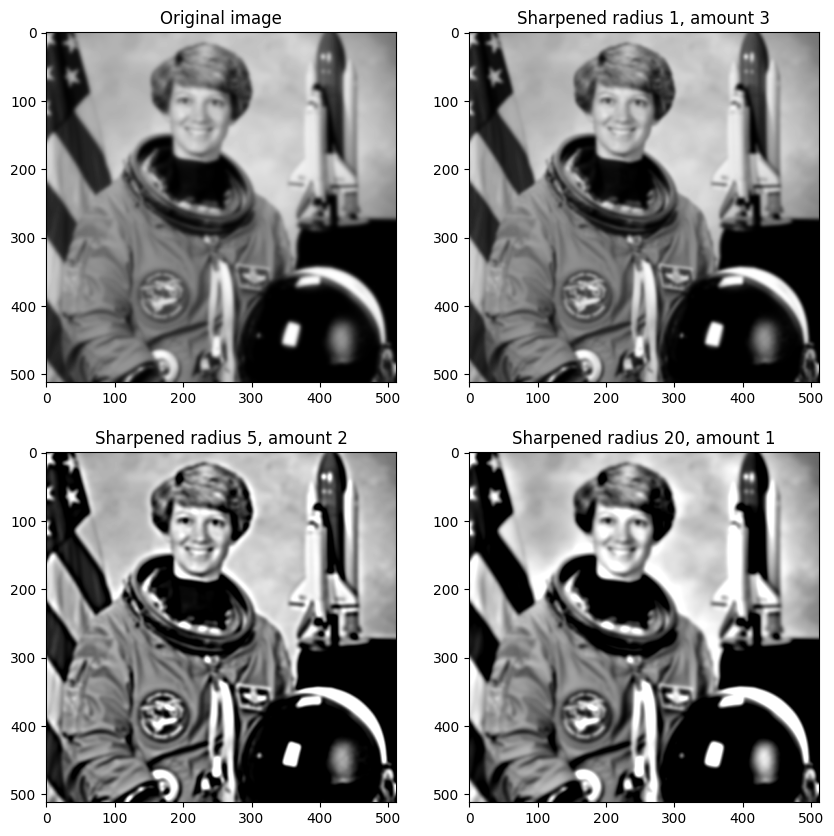

In [114]:
img_smooth = filters.gaussian(img, 2.5)

result_1 = filters.unsharp_mask(img_smooth, radius=1, amount=3)
result_2 = filters.unsharp_mask(img_smooth, radius=5, amount=2)
result_3 = filters.unsharp_mask(img_smooth, radius=20, amount=1)

fig = plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(img_smooth)
plt.title("Original image")


plt.subplot(222)
plt.imshow(result_1)
plt.title("Sharpened radius 1, amount 3")


plt.subplot(223)
plt.imshow(result_2)
plt.title("Sharpened radius 5, amount 2")


plt.subplot(224)
plt.imshow(result_3)
plt.title("Sharpened radius 20, amount 1")

# Task 4 
proof of convolution theorem for DFT

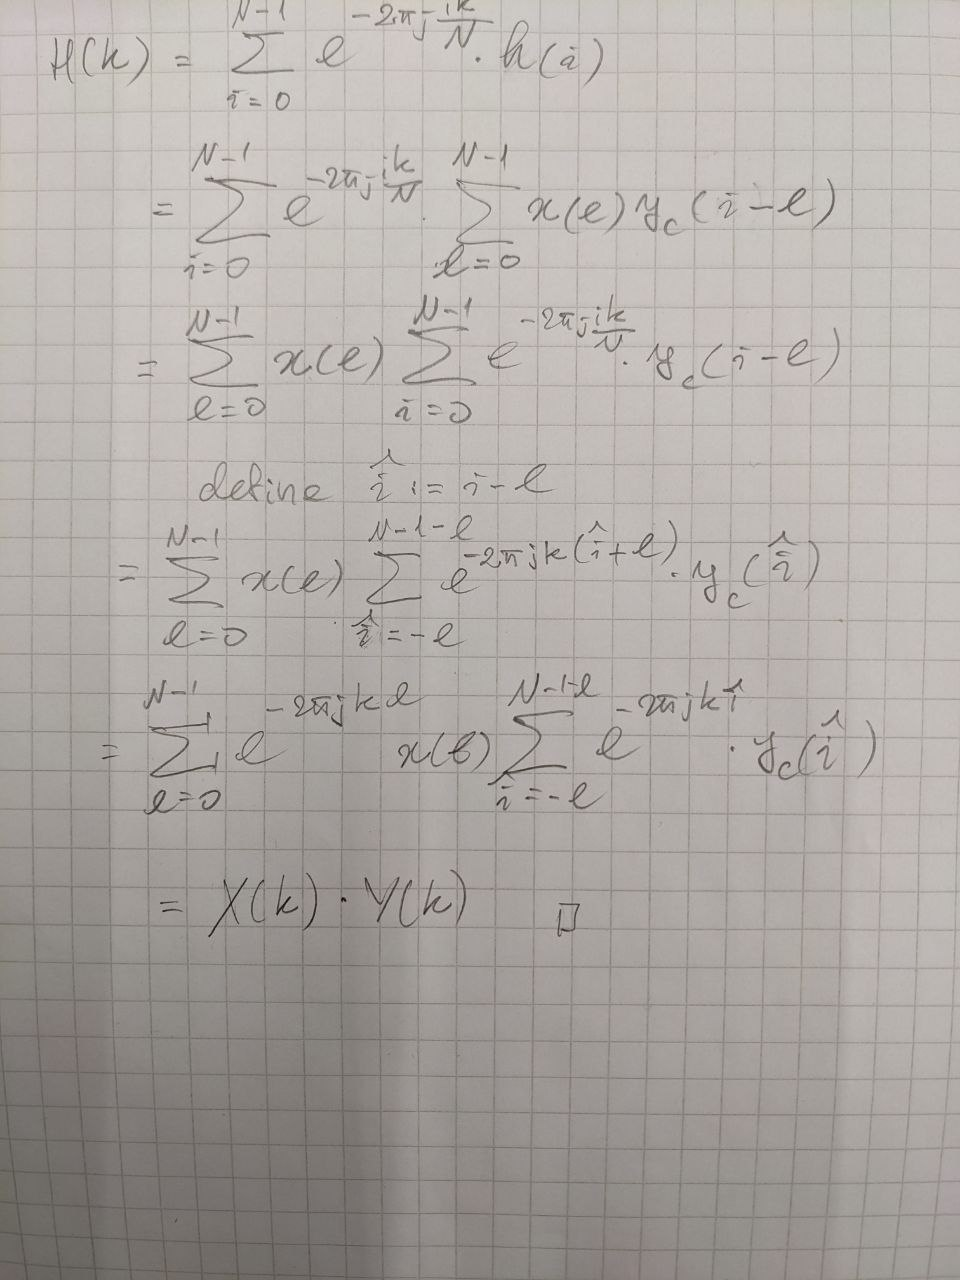

# Task 5

$N \log_2(N)$ additions and $1/2 N \log_2 (N)$ multiplications are needed to compute the Fast Fourier Transform (FFT) of N points. How many additions and multiplications are needed to compute the 2D FFT of and N x N image? What if the image is a spectral image of size N x N x N?

For NxN image, we will need to take FFT of every row and column. For additions on NxN image, this means taking:

$$
    N^2\log_2(N) + N^2\log_2(N) = 2N^2\log_2(N)
$$

number of additions. Similarly, we need $$ 1/2N^2\log_2(N) + 1/2N^2\log_2(N) = N^2\log_2(N) $$ multiplications (double the amount) for a square NxN image.

For a tensor of size NxNxN, we can think about the fact that N-Dimensional FFT is the same as a 1-D FFT with the size of the product of the dimensions. So, we should see:

$$ N^3 3 \log_2(N) $$ 
additions and 
$$ 3/2 N^3 \log_2(N) $$ 
multiplications.